In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.collections import LineCollection

from sklearn.isotonic import IsotonicRegression


# For reproducibility
np.random.seed(1000)

nb_samples = 100

def show_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(30, 25))

    ax.plot(X, Y, 'b.-')
    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    plt.show()

In [3]:
def show_isotonic_regression_segments(X, Y, Yi, segments):
    lc = LineCollection(segments, zorder=0)
    lc.set_array(np.ones(len(Y)))
    lc.set_linewidths(0.5 * np.ones(nb_samples))

    fig, ax = plt.subplots(1, 1, figsize=(30, 25))

    ax.plot(X, Y, 'b.', markersize=8)
    ax.plot(X, Yi, 'g.-', markersize=8)
    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    plt.show()

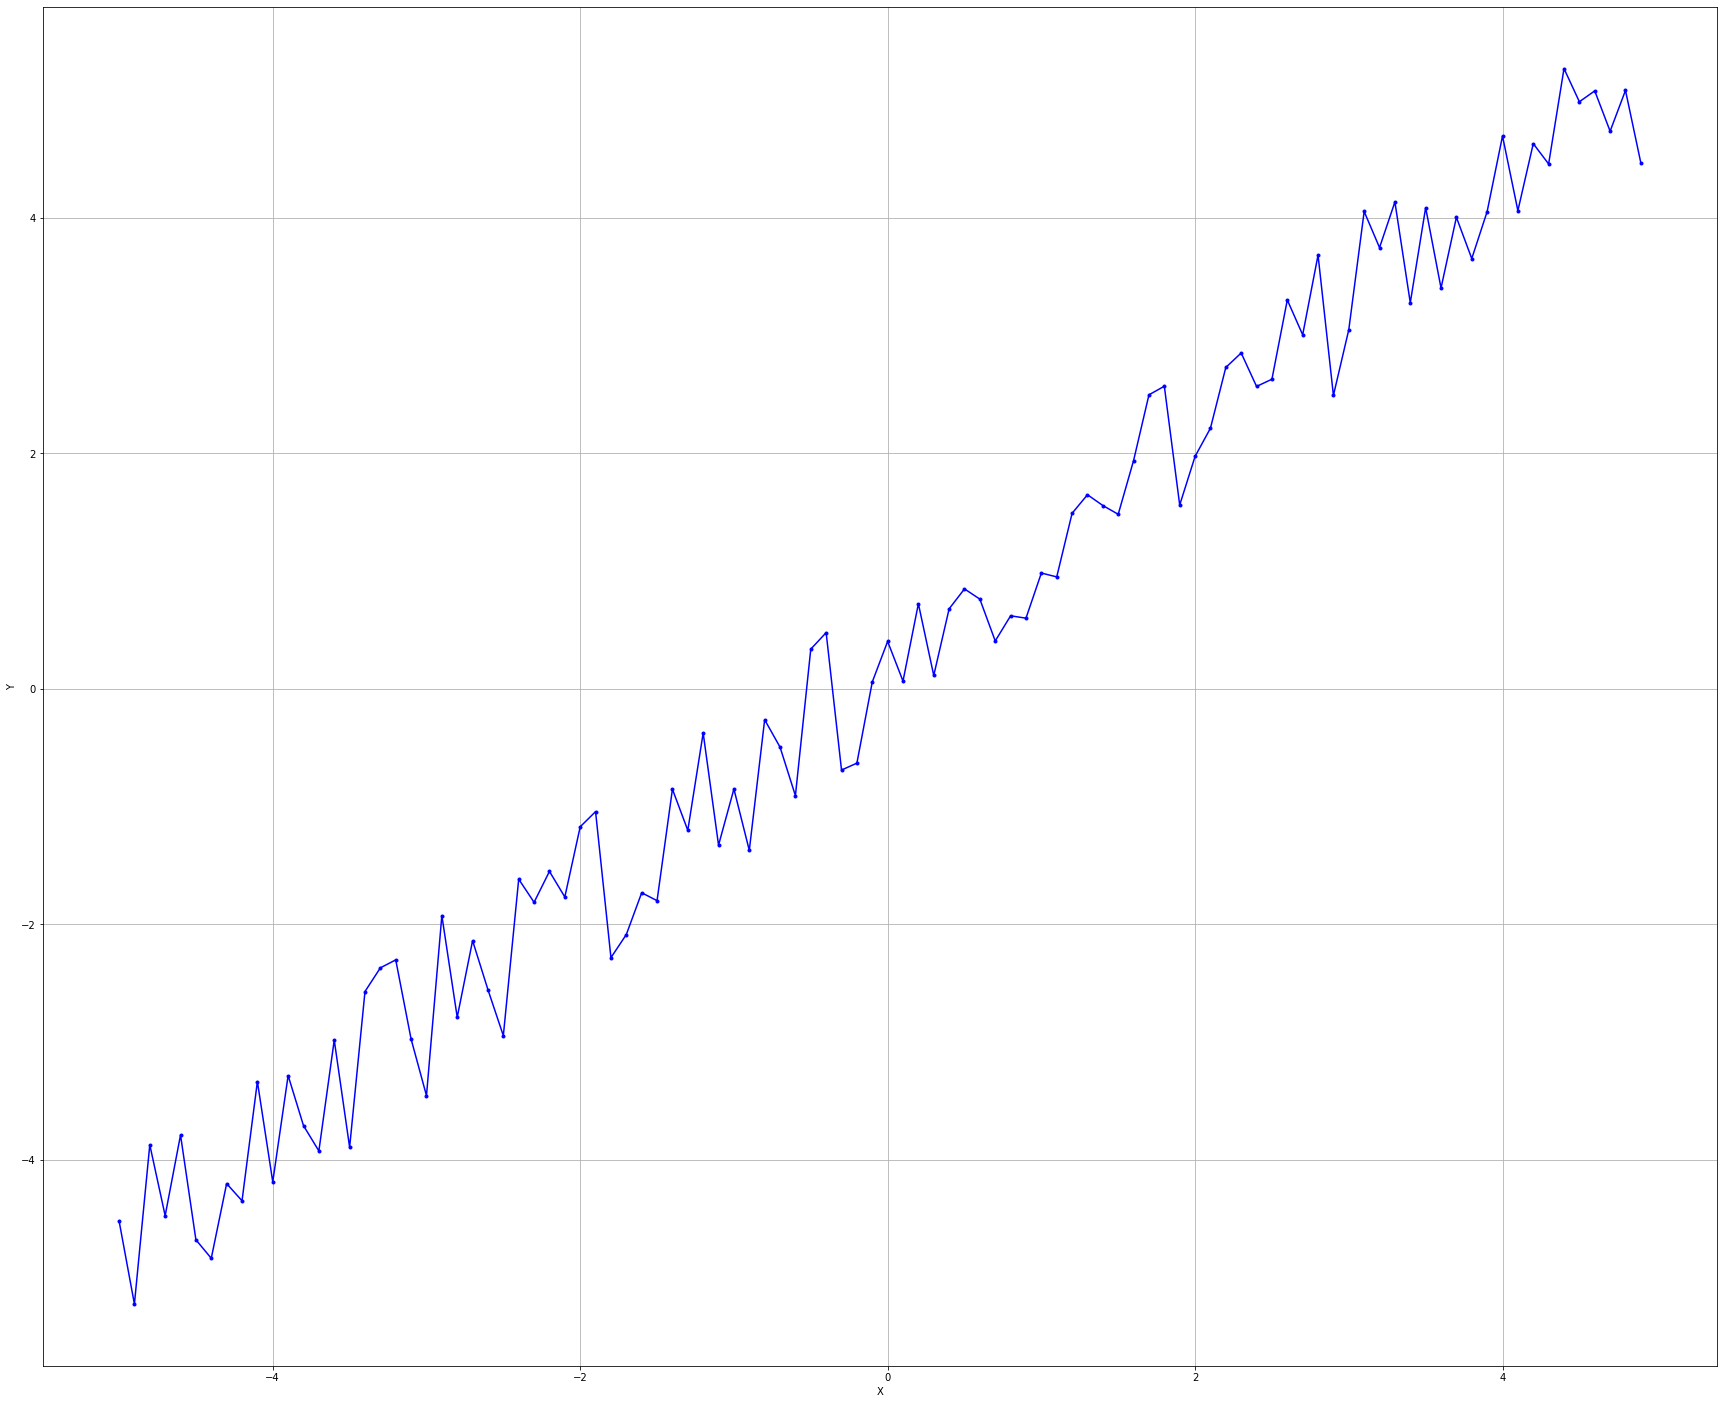

In [4]:
# Create dataset
X = np.arange(-5, 5, 0.1)
Y = X + np.random.uniform(-0.5, 1, size=X.shape)

# Show original dataset
show_dataset(X, Y)

The noise should alter the slope and intercept.

In [10]:
print(X.shape, Y.shape)
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(X.reshape(-1,1),Y.reshape(-1,1))
print(lr.intercept_, lr.coef_)

(100,) (100,)
[0.23034259] [[1.00303814]]


The intercept seems fine. It can be easily modeled by a linear regressor, but without a high non-linear function, it is very difficult to capture the ***slight*** (and ***local***) ***modifications in the slope***:

In [12]:
# Create an isotonic regressor. Needs to specify ymin and ymax
ir = IsotonicRegression(-6, 10)
Yi = ir.fit_transform(X, Y)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass y_min=-6, y_max=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


The result is provided through **three instance variables**:

In [13]:
print(ir.X_min_,ir.X_max_)
print(ir.f_)

-5.0 4.899999999999965


ir.f_ is an interpolating function which can be evaluated in the domain [xmin, xmax]. For example:

In [14]:
ir.f_(2)

array(2.15128692)

[[[0, -4.519615621803085], [0, -4.873552603558238]], [[1, -5.227489585313392], [1, -4.873552603558238]], [[2, -3.874575703476464], [2, -4.332602668004741]], [[3, -4.476712897858004], [3, -4.332602668004741]], [[4, -3.7912881972269483], [4, -4.332602668004741]], [[5, -4.681500978615922], [5, -4.332602668004741]], [[6, -4.838935562846369], [6, -4.332602668004741]], [[7, -4.204208307981444], [7, -4.2772550059794385]], [[8, -4.350301703977433], [8, -4.2772550059794385]], [[9, -3.337388913620411], [9, -3.763382698520147]], [[10, -4.189376483419883], [10, -3.763382698520147]], [[11, -3.286295699626391], [11, -3.641559909328187]], [[12, -3.7117688082867426], [12, -3.641559909328187]], [[13, -3.926615220071428], [13, -3.641559909328187]], [[14, -2.984690878111795], [14, -3.4401588783284343]], [[15, -3.8956268785450736], [15, -3.4401588783284343]], [[16, -2.5719941934288797], [16, -2.735938704786532]], [[17, -2.3710334011676935], [17, -2.735938704786532]], [[18, -2.3032848479837402], [18, -2.73

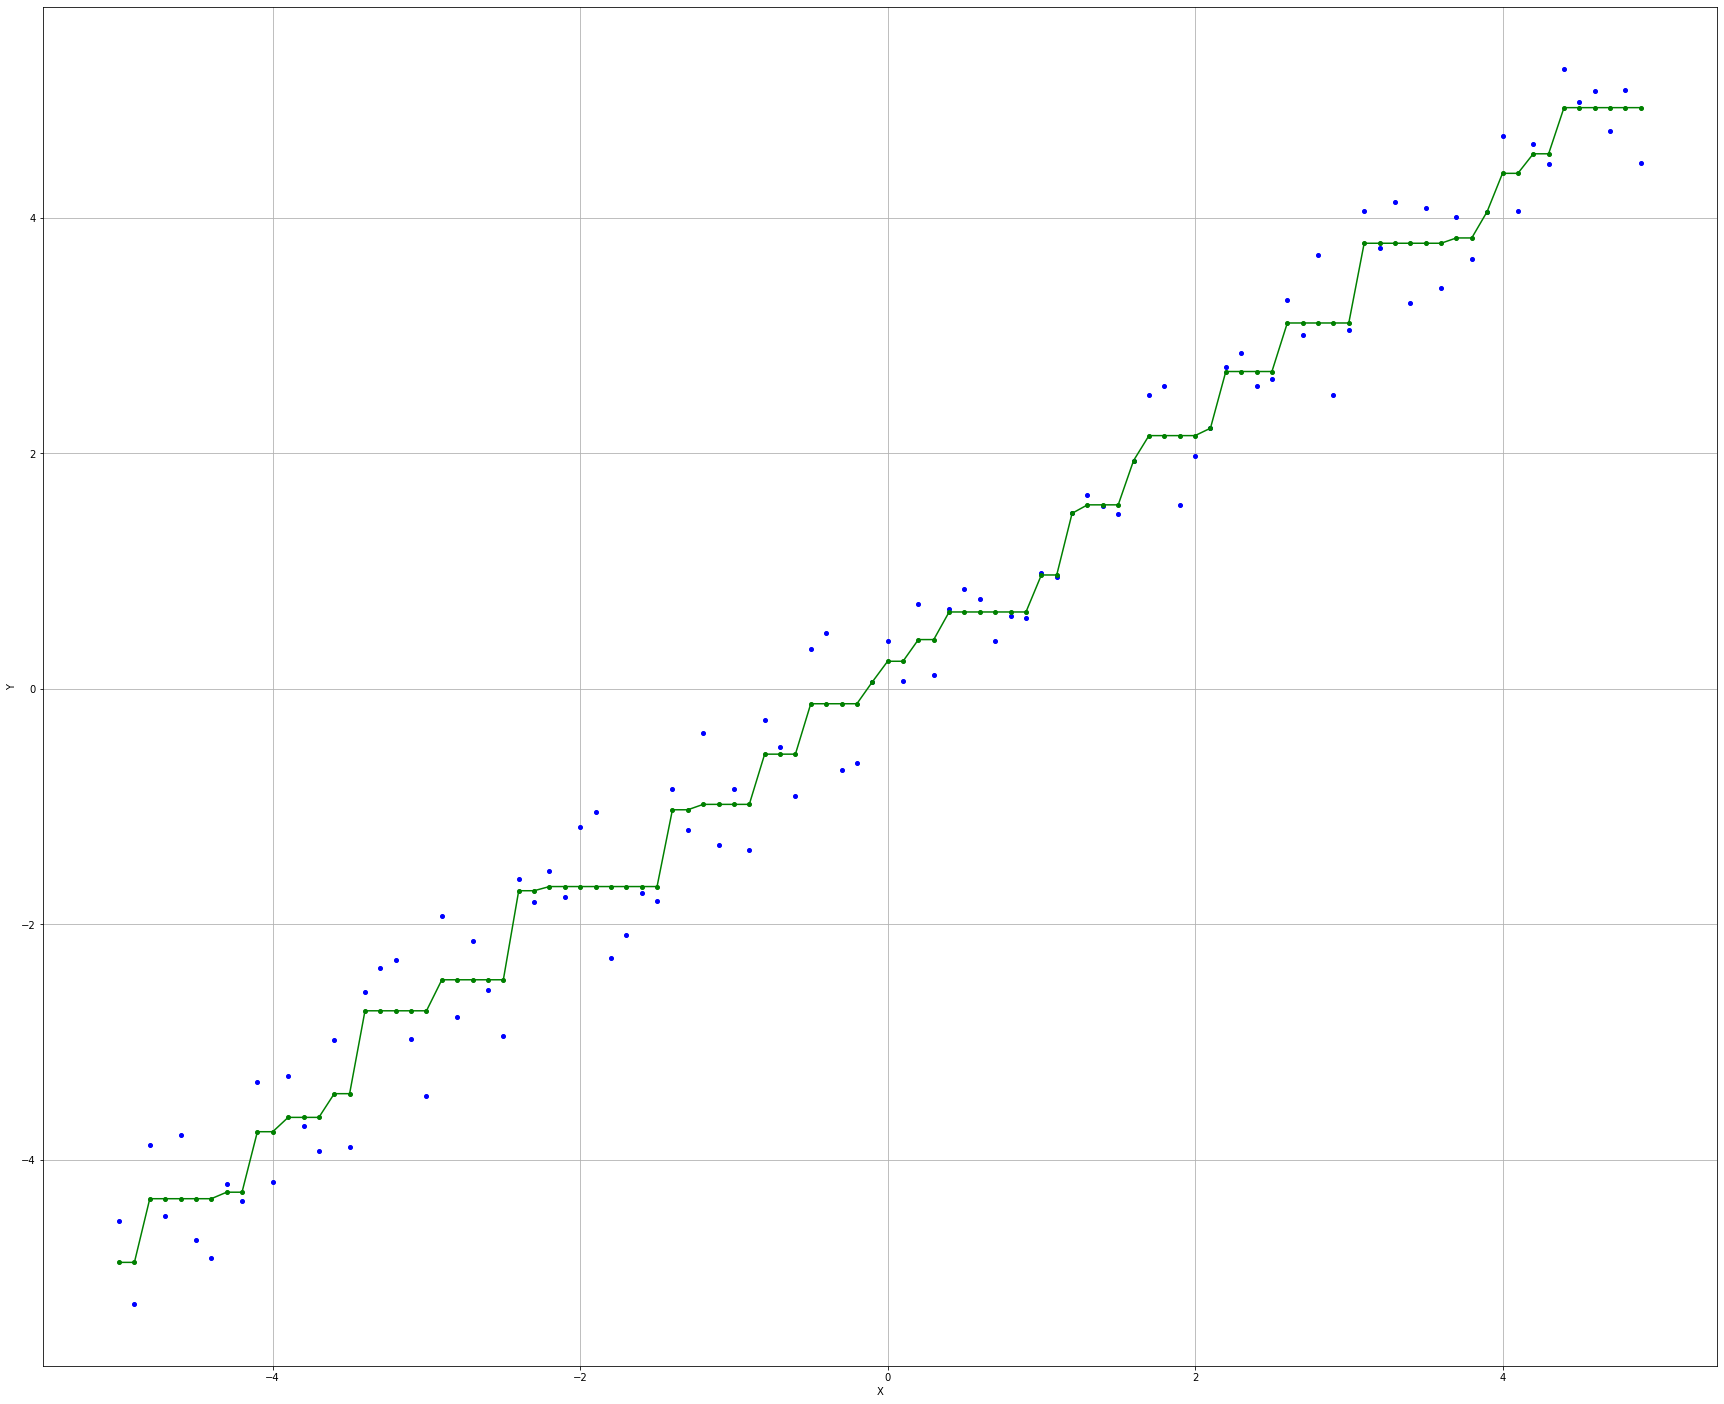

In [16]:
# Create a segment list
segments = [[[i, Y[i]], [i, Yi[i]]] for i in range(nb_samples)]

# Show isotonic interpolation
show_isotonic_regression_segments(X, Y, Yi, segments)

In [19]:
Yi

array([-4.8735526 , -4.8735526 , -4.33260267, -4.33260267, -4.33260267,
       -4.33260267, -4.33260267, -4.27725501, -4.27725501, -3.7633827 ,
       -3.7633827 , -3.64155991, -3.64155991, -3.64155991, -3.44015888,
       -3.44015888, -2.7359387 , -2.7359387 , -2.7359387 , -2.7359387 ,
       -2.7359387 , -2.4723994 , -2.4723994 , -2.4723994 , -2.4723994 ,
       -2.4723994 , -1.71576618, -1.71576618, -1.68025503, -1.68025503,
       -1.68025503, -1.68025503, -1.68025503, -1.68025503, -1.68025503,
       -1.68025503, -1.02790251, -1.02790251, -0.98196047, -0.98196047,
       -0.98196047, -0.98196047, -0.55532465, -0.55532465, -0.55532465,
       -0.1269589 , -0.1269589 , -0.1269589 , -0.1269589 ,  0.05785934,
        0.23396097,  0.23396097,  0.41819104,  0.41819104,  0.65280794,
        0.65280794,  0.65280794,  0.65280794,  0.65280794,  0.65280794,
        0.96713786,  0.96713786,  1.49124723,  1.56303454,  1.56303454,
        1.56303454,  1.93946122,  2.15128692,  2.15128692,  2.15

Yi looks like a bunch of horizontal lines connected by lines. 